In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot


In [3]:
df = pd.read_csv("C:/Users/mahes/Downloads/cleaned_HR.csv")

In [4]:
df['res_win'] = df['res_win'].astype(int)
df['res_place'] = df['res_place'].astype(int)
df['RPR'] = df['RPR'].astype(int)
df['TR'] = df['TR'].astype(int)
df['runners'] = df['runners'].astype(int)
df['prize'] = df['prize'].astype(int)
df['metric'] = df['metric'].astype(int)
df['age'] = df['age'].astype(int)
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])
df['position'] = df['position'].astype(int) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149513 entries, 0 to 149512
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   149513 non-null  int64         
 1   rid          149513 non-null  int64         
 2   horseName    149513 non-null  object        
 3   age          149513 non-null  int32         
 4   trainerName  149513 non-null  object        
 5   jockeyName   149513 non-null  object        
 6   position     149513 non-null  int32         
 7   positionL    149513 non-null  float64       
 8   dist         149513 non-null  float64       
 9   RPR          149513 non-null  int32         
 10  TR           149513 non-null  int32         
 11  OR           149513 non-null  float64       
 12  runners      149513 non-null  int32         
 13  margin       149513 non-null  float64       
 14  weight       149513 non-null  int64         
 15  res_win      149513 non-null  int3

In [8]:
horse_data = df.drop(['date','time'], axis=1)

Accuracy: 1.0000


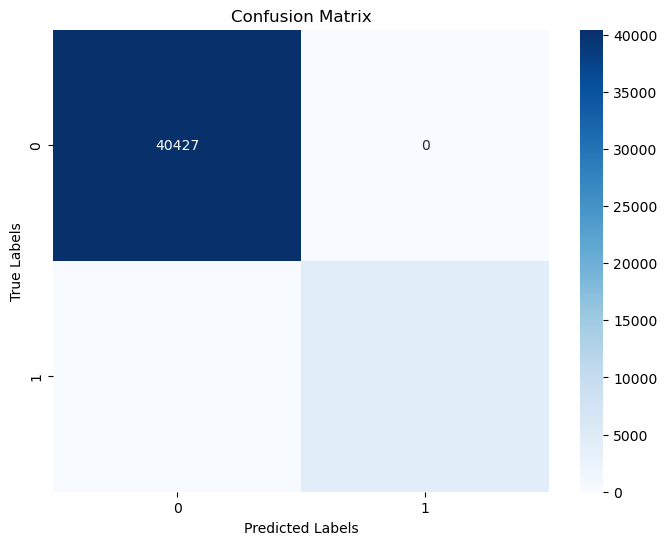

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40427
           1       1.00      1.00      1.00      4427

    accuracy                           1.00     44854
   macro avg       1.00      1.00      1.00     44854
weighted avg       1.00      1.00      1.00     44854



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset


# Identify categorical columns
categorical_cols = horse_data.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder or OneHotEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    horse_data[col] = le.fit_transform(horse_data[col])
    label_encoders[col] = le

# Separate features and target
X = horse_data.drop('res_win', axis=1)
y = horse_data['res_win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 1.0000


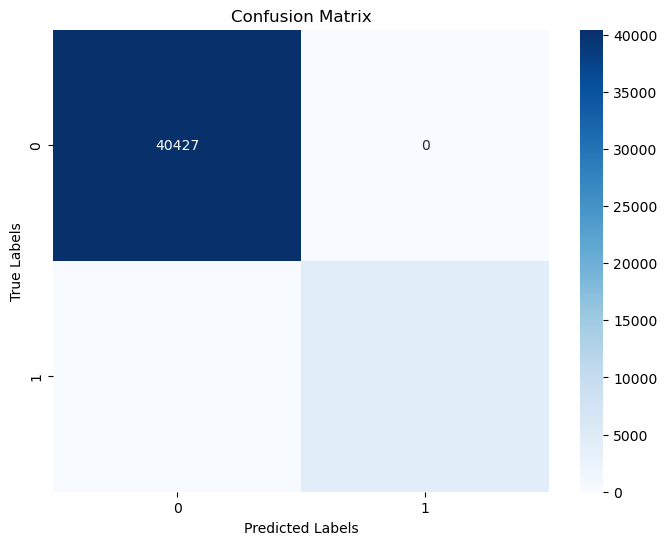

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40427
           1       1.00      1.00      1.00      4427

    accuracy                           1.00     44854
   macro avg       1.00      1.00      1.00     44854
weighted avg       1.00      1.00      1.00     44854



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load your dataset


# Identify categorical columns
categorical_cols = horse_data.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder or OneHotEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    horse_data[col] = le.fit_transform(horse_data[col])
    label_encoders[col] = le

# Separate features and target
X = horse_data.drop('res_win', axis=1)
y = horse_data['res_win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 1.0000


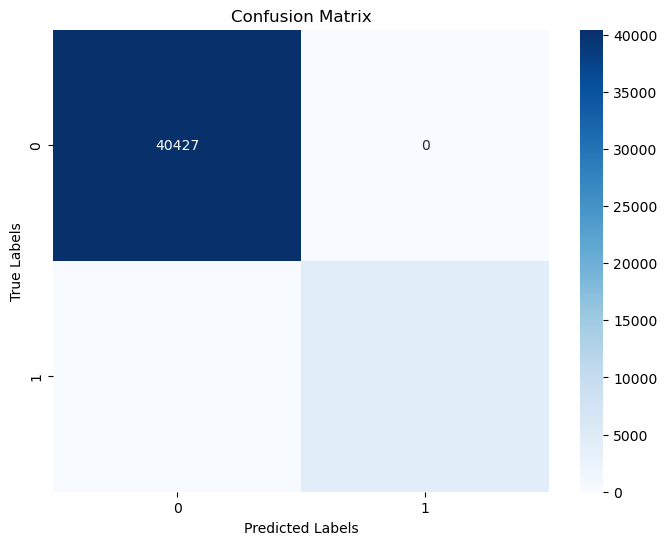

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40427
           1       1.00      1.00      1.00      4427

    accuracy                           1.00     44854
   macro avg       1.00      1.00      1.00     44854
weighted avg       1.00      1.00      1.00     44854



In [13]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load your dataset


# Identify categorical columns
categorical_cols = horse_data.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder or OneHotEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    horse_data[col] = le.fit_transform(horse_data[col])
    label_encoders[col] = le

# Separate features and target
X = horse_data.drop('res_win', axis=1)
y = horse_data['res_win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)
